# Auswertung der Messergebnisse

## Teil VIII.1 Importieren und grafische Darstellung der Messdaten

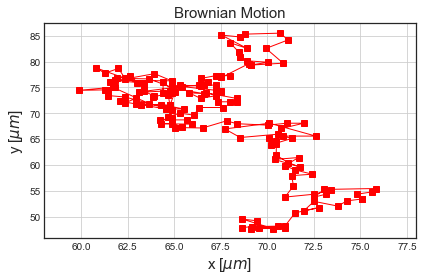

In [4]:
#Benötigte Pakete
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
plt.style.use('seaborn-white')

#Definition der Funktion, die Kommas durch Punkte ersetzt
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

#Laden der Messwerte
t,x,y=np.loadtxt(r'Daten/Messung.dat', skiprows=1, usecols=(1,2,3), 
converters= {1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)

#Plotten des zurückgelegten Weges
plt.plot(x, y, marker='s', color='red', linewidth=1)
plt.xlabel('x ['+'$\mu m$]', size=15)
plt.ylabel('y ['+'$\mu m$]', size=15)
plt.title('Brownian Motion', size=15)
plt.xlim(58,78)
plt.grid(True)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V223Diagramm1.pdf', format='PDF')



## Teil VIII.2 Berechnung des mittleren Verschiebungsquadrates mit Fehler

In [5]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i+1
    
#quadratische Verschiebung
r_squared=dx**2+dy**2

#Berechnung und Ausgabe der gesuchten Größen
r_squared_mean=np.mean(r_squared)*1e-12 #Umrechnung in SI-Einheiten
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared))*1e-12

dt_mean=np.mean(dt)
dt_mean_std=np.std(dt)/np.sqrt(len(dt))

print("r_squared_mean = " ,r_squared_mean, "[m^2]")
print("r_squared_mean_std = " ,r_squared_mean_std, "[m^2]")
print ()
print("dt_mean =", dt_mean, "[s]")
print("dt_mean_std =",dt_mean_std, "[s]")



r_squared_mean =  2.40610160645e-12 [m^2]
r_squared_mean_std =  2.12408467917e-13 [m^2]

dt_mean = 1.00051612903 [s]
dt_mean_std = 4.11639585642e-05 [s]


### Bestimmung der Diffusionskonstante D und der Boltzmann-Konstante k

In [6]:
D_1=r_squared_mean/4/dt_mean #Aus Gleichung 15 
D_1_std=((r_squared_mean_std/4/dt_mean)**2+(r_squared_mean*dt_mean_std/4/dt_mean**2)**2)**0.5

eta=9.4e-4  #Aus Abbildung 12
eta_std= 0.1e-4
a=0.5*755e-9
a_std=0.5*30e-9
T=22.8+273.15  #Umrechnung in Kelvin
T_std=0.2

k_1=6*np.pi*eta*a*r_squared_mean/(4*T*dt_mean) #Gleichung 21 im Skript
#Fehler mittels Fehlerfortpflanzung
k_1_std=k_1*((eta_std/eta)**2+(a_std/a)**2+(r_squared_mean_std/r_squared_mean)**2+(T_std/T)**2+(dt_mean_std/dt_mean)**2)**0.5
print ("D_1 = "+str(D_1)+" +/- "+str(D_1_std),"[m^2/s]")
print ()
print ("k_1 = "+str(k_1)+" +/- "+str(k_1_std), "[J/K]")

D_1 = 6.01215097047e-13 +/- 5.30747293375e-14 [m^2/s]

k_1 = 1.35880603134e-23 +/- 1.32340370382e-24 [J/K]


## VIII.3 Kontrollverteilung

Mittelwert =  0.109112903226 [10^-6 m]
Standardabweichung =  1.09139597653 [10^-6 m]


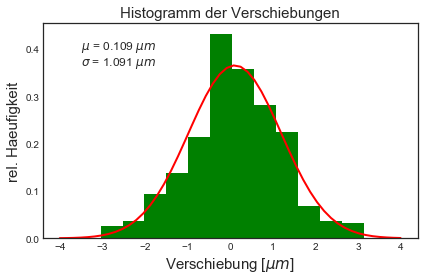

In [16]:
#Plot des Histograms und Variation der Parameter
plt.xlabel('Verschiebung ['+'$\mu m$]', size=15)
plt.ylabel('rel. Haeufigkeit',size=15)
plt.title('Histogramm der Verschiebungen',size=15)
all_data=np.append(dx,dy)
plt.hist(all_data, bins = 12, normed=1, color="green")

#Berechnung von Sigma und dem Mittelwert mit anschließendem Plotten der Gaußkurve
mu=np.mean(all_data)
sigma=np.std(all_data)
gauss = mlab.normpdf(np.linspace(-4,4), mu , sigma)
plt.plot(np.linspace(-4,4), gauss, 'b-', linewidth=2, color="red")

sig = str(round(sigma, 3))
mu_wert= str(round(mu, 3))
plt.text(-3.5,0.4, '$\mu$ = %s $\mu m$' %mu_wert, fontsize = 12)
plt.text(-3.5, 0.365, '$\sigma$ = %s $\mu m$' %sig, fontsize = 12)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V223Diagramm2.pdf', format='PDF')

print("Mittelwert = ", mu,"[10^-6 m]")
print("Standardabweichung = ",sigma,"[10^-6 m]")

## VIII.4 Kummulative Verteilung der Verschiebungsquadrate

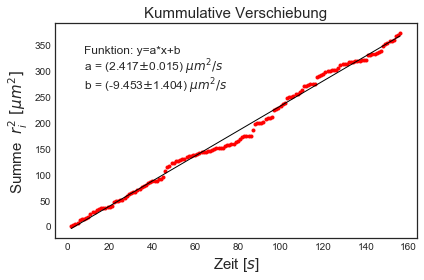

In [9]:
#Plot der kummulativen Verschiebung
r_kumm=np.cumsum(r_squared) 
plt.plot(t[:-1],r_kumm,marker='.',color="red",linewidth=0)
plt.xlabel("Zeit [$s$]",size=15)
plt.ylabel("Summe $ \ r_i^2 \ [\mu m^2]$",size=15)
plt.title("Kummulative Verschiebung", size=15)



#Import der Funktion zum fitten der Kurve
from scipy.optimize import curve_fit 

#Definition der Ausgleichsgerade
def linear(x,a,b):
    return a*x+b

popt,pcov=curve_fit(linear,t[:-1],r_kumm)


#Plot der Ausgleichsgeraden
plt.plot(t[:-1],linear(t[:-1],*popt),color="black",linewidth=1)
plt.text(8,335, "Funktion: y=a*x+b", fontsize=12)
plt.text(8,300, "a = ("+str(round(popt[0],3))+"$\pm$"+str(round(pcov[0,0]**0.5,3))+") $\mu m^2/s$",fontsize=12)
plt.text(8,265,"b = ("+str(round(popt[1],3))+"$\pm$"+str(round(pcov[1,1]**0.5,3))+") $\mu m^2/s$", fontsize=12)
#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V223Diagramm3.pdf', format='PDF')

## Bestimmung von D und k aus der kummulativen Verschiebung

In [24]:
#D aus Steigung der Fit-Gerade und Gleichung 15 im Skript (in SI-Einheit)
D_2=0.25e-12*popt[0]
D_2_std=0.25e-12*pcov[0,0]**0.5

#k aus Gleichung 19 im Skript
k_2= D_2*6*np.pi*eta*a/T
k_2_std= k_2*((D_2_std/D_2)**2+(eta_std/eta)**2+(a_std/a)**2+(T_std/T)**2)**0.5

print ("D_2 = "+str(D_2)+" +/- "+str(D_2_std),"[m^2/s]")
print()
print ("k_2 = "+str(k_2)+" +/- "+str(k_2_std), "[J/K]")



D_2 = 6.04239924805e-13 +/- 3.86281633224e-15 [m^2/s]

k_2 = 1.3656424435e-23 +/- 5.68569408722e-25 [J/K]


## Vergleich der Ergebnisse für D und k

In [25]:
k_lit=1.38064852e-23 #von Wikipedia
k_lit_std=79e-31

#Vergleich der Diffusionskonstanten
dif_D=np.abs(D_1-D_2)
#Fehler der Differenz
dif_D_std=(D_1_std**2+D_2_std**2)**0.5

#Vergleich der Boltzmann-Konstanten
dif_k=np.abs(k_1-k_2)
#Fehler der Differenz
dif_k_std=(k_1_std**2+k_2_std**2)**0.5

#Vergleich der Werte mit dem Literaturwert
dif_k_1_lit=np.abs(k_1-k_lit)
dif_k_1_lit_std=(k_1_std**2+k_lit_std**2)**0.5

dif_k_2_lit=np.abs(k_2-k_lit)
dif_k_2_lit_std=(k_2_std**2+k_lit_std**2)**0.5

print("dif_D = "+str(dif_D)+" +/- "+str(dif_D_std),"[m^2/s]")
print()
print("dif_k = "+str(dif_k)+" +/- "+str(dif_k_std), "[J/K]")
print()
print()
print("dif_k_1_lit = "+str(dif_k_1_lit)+" +/- "+str(dif_k_1_lit_std), "[J/K]")
print()
print("dif_k_2_lit = "+str(dif_k_2_lit)+" +/- "+str(dif_k_2_lit_std), "[J/K]")

dif_D = 3.02482775822e-15 +/- 5.3215112931e-14 [m^2/s]

dif_k = 6.83641216235e-26 +/- 1.4403709716e-24 [J/K]


dif_k_1_lit = 2.1842488659e-25 +/- 1.32340370385e-24 [J/K]

dif_k_2_lit = 1.50060764967e-25 +/- 5.68569408777e-25 [J/K]


Die ermittelten Werte passen jeweils sehr gut zusammen.
Die beiden Werte für die Diffusionskonstante liegen im $1\sigma-$Bereich, die Werte für k ebenfalls im $1\sigma-$Bereich.
Auch mit dem Literaturwert $k_{lit}$ sind beide Werte $\ k_1$ und  $\ k_2$ sehr gut vereinbar $(\ 1\sigma-$Intervall \).